In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('weatherHistory.csv')

In [3]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df = data[['Formatted Date','Apparent Temperature (C)','Humidity']]

In [5]:
df

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83
...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,26.016667,0.43
96449,2016-09-09 20:00:00.000 +0200,24.583333,0.48
96450,2016-09-09 21:00:00.000 +0200,22.038889,0.56
96451,2016-09-09 22:00:00.000 +0200,21.522222,0.60


In [6]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc = True)
df_new = df.set_index('Formatted Date')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_new

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 22:00:00+00:00,7.388889,0.89
2006-03-31 23:00:00+00:00,7.227778,0.86
2006-04-01 00:00:00+00:00,9.377778,0.89
2006-04-01 01:00:00+00:00,5.944444,0.83
2006-04-01 02:00:00+00:00,6.977778,0.83
...,...,...
2016-09-09 17:00:00+00:00,26.016667,0.43
2016-09-09 18:00:00+00:00,24.583333,0.48
2016-09-09 19:00:00+00:00,22.038889,0.56


In [8]:
df_new = df_new.resample('MS').mean()
df_new.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


In [11]:
aTemp = df_new['Apparent Temperature (C)']
humidity = df_new['Humidity']

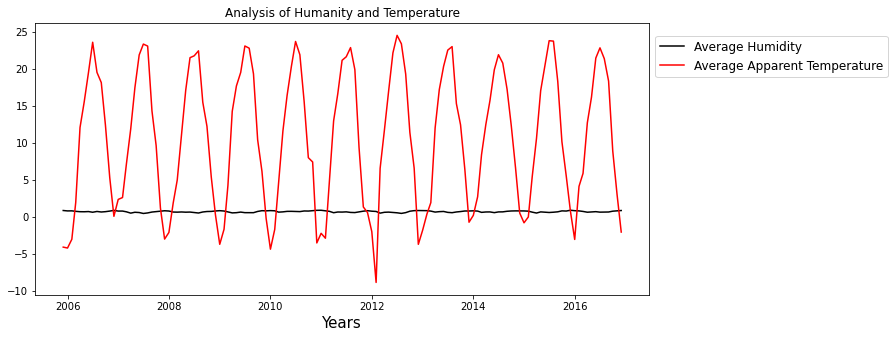

In [12]:
#graph to display Average Humidity and Average Apparent Temperature over 10 years(2006–2016)
plt.figure(figsize=(11,5))
plt.title('Analysis of Humanity and Temperature')
plt.plot(humidity,label='Average Humidity',color="Black")
plt.plot(aTemp,label='Average Apparent Temperature',color="Red")
plt.legend(loc=(1.01,0.8),fontsize="large")
plt.xlabel("Years",fontsize=15)
plt.show()

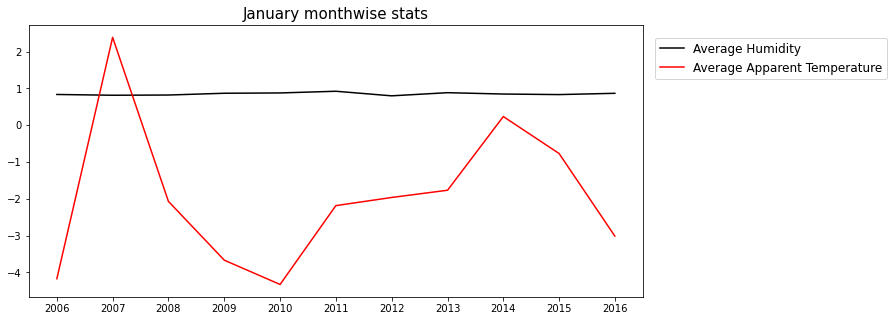

In [13]:
#january
plt.figure(figsize=(11,5))
df_mon_jan = df_new[df_new.index.month==1]
hum = df_mon_jan['Humidity']
atemp = df_mon_jan['Apparent Temperature (C)']
plt.title("January monthwise stats",fontsize=15)
plt.plot(hum,label='Average Humidity',color="Black")
plt.plot(atemp,label='Average Apparent Temperature',color="Red")
plt.legend(loc=(1.02,0.8),fontsize="large")
plt.show()

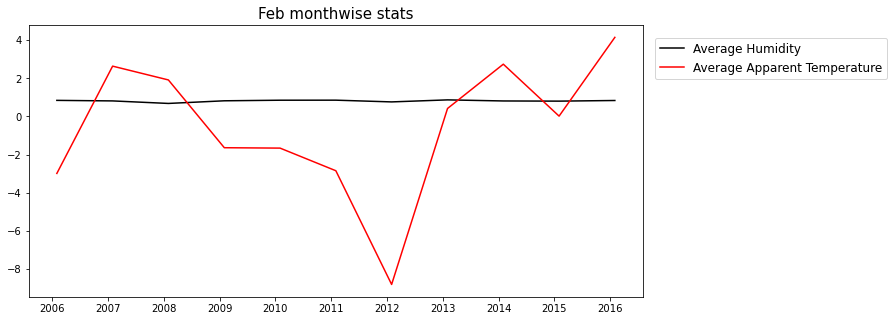

In [19]:
#February
plt.figure(figsize=(11,5))
df_mon_feb = df_new[df_new.index.month==2]
hum = df_mon_feb['Humidity']
atemp = df_mon_feb['Apparent Temperature (C)']
plt.title("Feb monthwise stats",fontsize=15)
plt.plot(hum,label='Average Humidity',color="Black")
plt.plot(atemp,label='Average Apparent Temperature',color="Red")
plt.legend(loc=(1.02,0.8),fontsize="large")
plt.show()

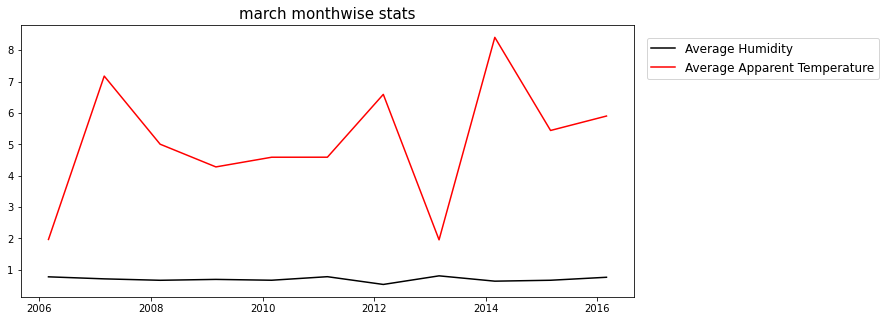

In [20]:
#march
plt.figure(figsize=(11,5))
df_mon_mar = df_new[df_new.index.month==3]
hum = df_mon_mar['Humidity']
atemp = df_mon_mar['Apparent Temperature (C)']
plt.title("march monthwise stats",fontsize=15)
plt.plot(hum,label='Average Humidity',color="Black")
plt.plot(atemp,label='Average Apparent Temperature',color="Red")
plt.legend(loc=(1.02,0.8),fontsize="large")
plt.show()

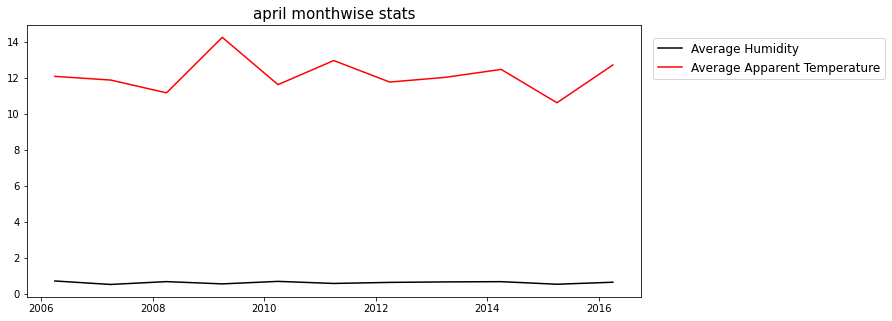

In [21]:
#April
plt.figure(figsize=(11,5))
df_mon_apr = df_new[df_new.index.month==4]
hum = df_mon_apr['Humidity']
atemp = df_mon_apr['Apparent Temperature (C)']
plt.title("april monthwise stats",fontsize=15)
plt.plot(hum,label='Average Humidity',color="Black")
plt.plot(atemp,label='Average Apparent Temperature',color="Red")
plt.legend(loc=(1.02,0.8),fontsize="large")
plt.show()

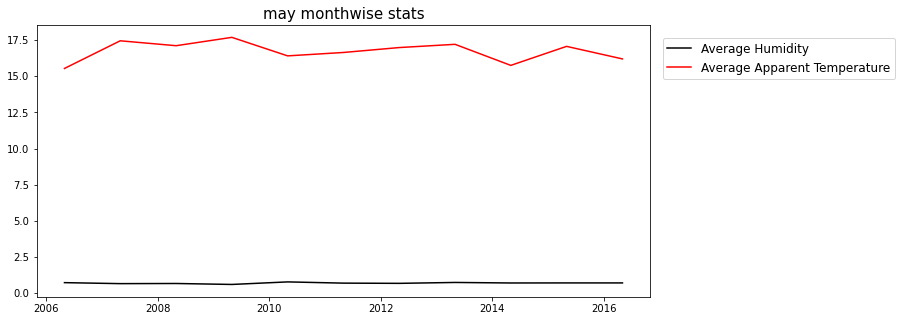

In [22]:
#may
plt.figure(figsize=(11,5))
df_mon_may = df_new[df_new.index.month==5]
hum = df_mon_may['Humidity']
atemp = df_mon_may['Apparent Temperature (C)']
plt.title("may monthwise stats",fontsize=15)
plt.plot(hum,label='Average Humidity',color="Black")
plt.plot(atemp,label='Average Apparent Temperature',color="Red")
plt.legend(loc=(1.02,0.8),fontsize="large")
plt.show()

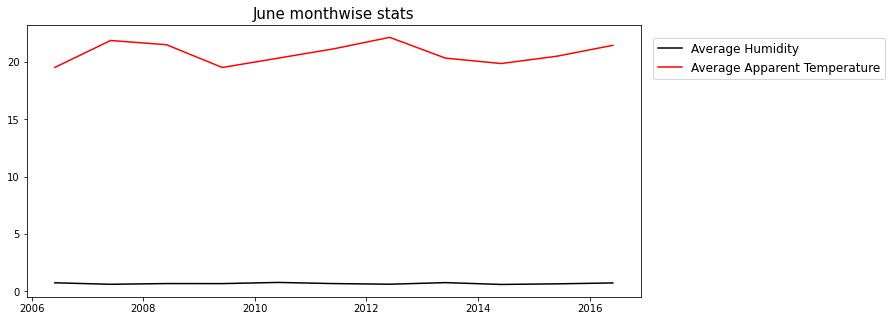

In [23]:
#june
plt.figure(figsize=(11,5))
df_mon_june = df_new[df_new.index.month==6]
hum = df_mon_june['Humidity']
atemp = df_mon_june['Apparent Temperature (C)']
plt.title("June monthwise stats",fontsize=15)
plt.plot(hum,label='Average Humidity',color="Black")
plt.plot(atemp,label='Average Apparent Temperature',color="Red")
plt.legend(loc=(1.02,0.8),fontsize="large")
plt.show()

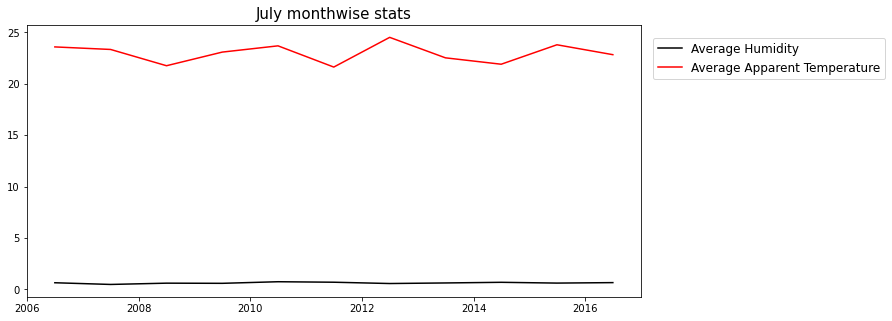

In [29]:
#july
plt.figure(figsize=(11,5))
df_mon_july = df_new[df_new.index.month==7]
hum = df_mon_july['Humidity']
atemp = df_mon_july['Apparent Temperature (C)']
plt.title("July monthwise stats",fontsize=15)
plt.plot(hum,label='Average Humidity',color="Black")
plt.plot(atemp,label='Average Apparent Temperature',color="Red")
plt.legend(loc=(1.02,0.8),fontsize="large")
plt.show()

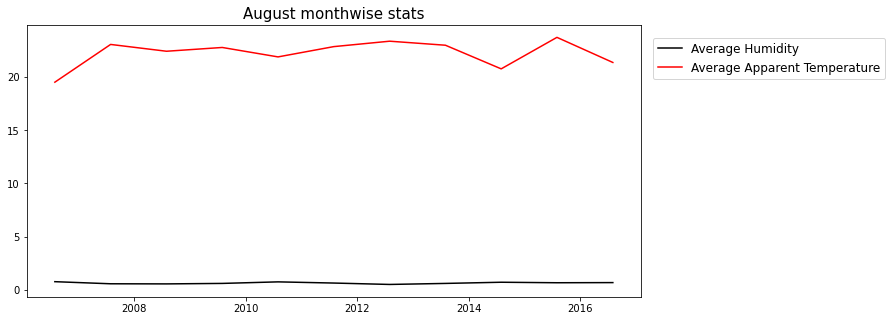

In [28]:
#August
plt.figure(figsize=(11,5))
df_mon_aug = df_new[df_new.index.month==8]
hum = df_mon_aug['Humidity']
atemp = df_mon_aug['Apparent Temperature (C)']
plt.title("August monthwise stats",fontsize=15)
plt.plot(hum,label='Average Humidity',color="Black")
plt.plot(atemp,label='Average Apparent Temperature',color="Red")
plt.legend(loc=(1.02,0.8),fontsize="large")
plt.show()

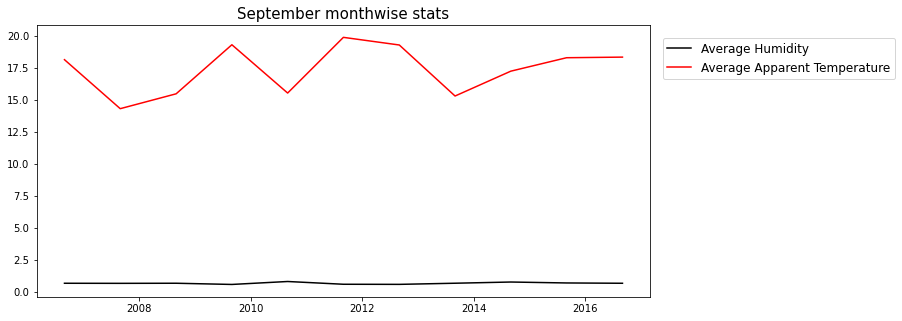

In [27]:
#september
plt.figure(figsize=(11,5))
df_mon_sep = df_new[df_new.index.month==9]
hum = df_mon_sep['Humidity']
atemp = df_mon_sep['Apparent Temperature (C)']
plt.title("September monthwise stats",fontsize=15)
plt.plot(hum,label='Average Humidity',color="Black")
plt.plot(atemp,label='Average Apparent Temperature',color="Red")
plt.legend(loc=(1.02,0.8),fontsize="large")
plt.show()

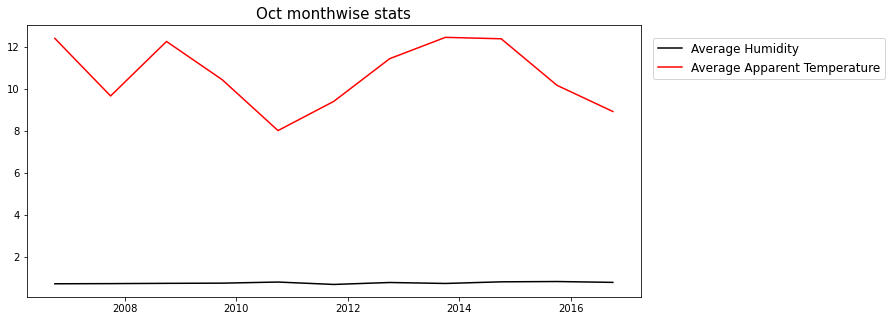

In [31]:
#october
plt.figure(figsize=(11,5))
df_mon_oct = df_new[df_new.index.month==10]
hum = df_mon_oct['Humidity']
atemp = df_mon_oct['Apparent Temperature (C)']
plt.title("Oct monthwise stats",fontsize=15)
plt.plot(hum,label='Average Humidity',color="Black")
plt.plot(atemp,label='Average Apparent Temperature',color="Red")
plt.legend(loc=(1.02,0.8),fontsize="large")
plt.show()

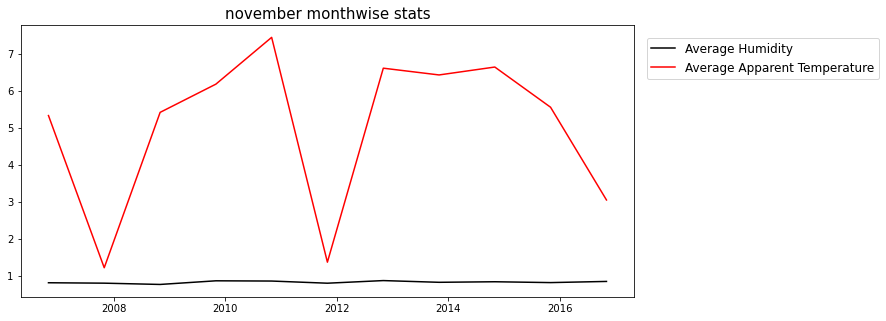

In [32]:
plt.figure(figsize=(11,5))
df_mon_nov = df_new[df_new.index.month==11]
hum = df_mon_nov['Humidity']
atemp = df_mon_nov['Apparent Temperature (C)']
plt.title("november monthwise stats",fontsize=15)
plt.plot(hum,label='Average Humidity',color="Black")
plt.plot(atemp,label='Average Apparent Temperature',color="Red")
plt.legend(loc=(1.02,0.8),fontsize="large")
plt.show()

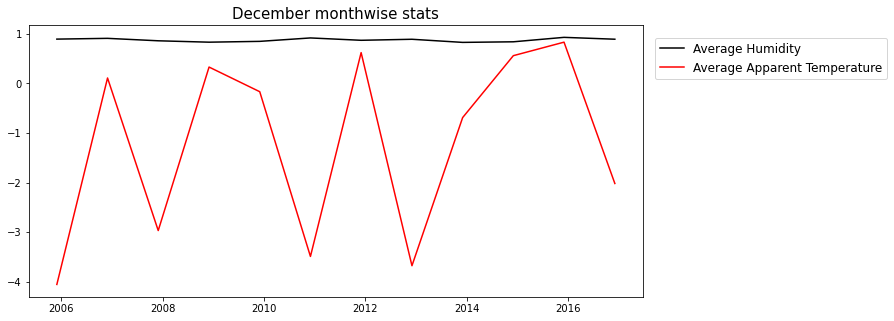

In [33]:
plt.figure(figsize=(11,5))
df_mon_dec = df_new[df_new.index.month==12]
hum = df_mon_dec['Humidity']
atemp = df_mon_dec['Apparent Temperature (C)']
plt.title("December monthwise stats",fontsize=15)
plt.plot(hum,label='Average Humidity',color="Black")
plt.plot(atemp,label='Average Apparent Temperature',color="Red")
plt.legend(loc=(1.02,0.8),fontsize="large")
plt.show()